In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import seaborn as sns
import pandas as pd
import random
import statistics
import gzip
import scipy
from collections import Counter
import neutcurve

In [2]:
b2AR_df = pd.read_csv('b2AR_all_data_annot.csv.gz', compression='gzip', index_col=0, low_memory=False)

In [4]:
aas = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W', 'S', 'T', 'N', 'Q', 'C', 'G', 'P', 'R', 'H', 'K', 'D', 'E', '*', 'del']

b2AR_aa_seq = 'MGQPGNGSAFLLAPNRSHAPDHDVTQQRDEVWVVGMGIVMSLIVLAIVFGNVLVITAIAKFERLQTVTNYFITSLACADLVMGLAVVPFGAAHILMKMWTFGNFWCEFWTSIDVLCVTASIETLCVIAVDRYFAITSPFKYQSLLTKNKARVIILMVWIVSGLTSFLPIQMHWYRATHQEAINCYANETCCDFFTNQAYAIASSIVSFYVPLVIMVFVYSRVFQEAKRQLQKIDKSEGRFHVQNLSQVEQDGRTGHGLRRSSKFCLKEHKALKTLGIIMGTFTLCWLPFFIVNIVHVIQDNLIRKEVYILLNWIGYVNSGFNPLIYCRSPDFRIAFQELLCLRRSSLKAYGNGYSSNGNTGEQSGYHVEQEKENKLLCEDLPGTEDFVGHQGTVPSDNIDSQGRNCSTNDSLL'
poss = list(range(1, (len(b2AR_aa_seq)+1)))
ordered_vars = []
for pos in poss:
    for aa in aas:
        ordered_vars.append(b2AR_aa_seq[pos-1]+str(pos)+ aa)

9381


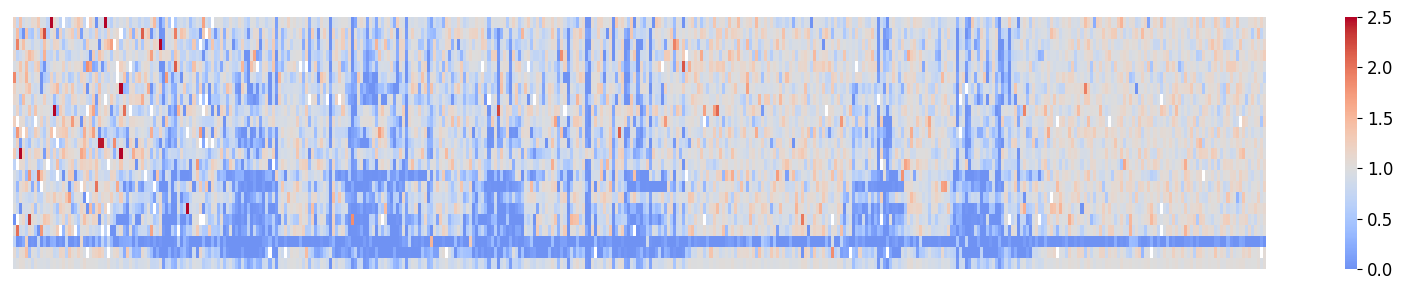

In [6]:
b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_10uM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_2.8uM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_816nM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_233nM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_66nM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_19nM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_5.4nM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_1.5nM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_444pM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_126pM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_36pM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))
#b2AR_Nb80_isoP_re = np.reshape(list(b2AR_df['Nb80_10pM_WT_normed_score'])[1:], (len(b2AR_aa_seq), 22))



b2AR_Nb80_isoP_heatmap = pd.DataFrame(b2AR_Nb80_isoP_re, columns=aas, index=np.arange(1, 414)).T
b2AR_Nb80_isoP_heatmap.loc['Median'] = b2AR_Nb80_isoP_heatmap[:20].median(axis=0)

plt.figure(figsize=(16, 3))

ax = sns.heatmap(b2AR_Nb80_isoP_heatmap, cmap='coolwarm', vmin=0, vmax=2.5, center=1, xticklabels=25, yticklabels=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.xticks([])
plt.yticks([])

print (b2AR_Nb80_isoP_heatmap.notna().sum().sum())
plt.tight_layout()
#plt.savefig('dose_response_10uM_heatmap_no_labels.png', dpi=300)

In [7]:
b2AR_df_filt = b2AR_df.loc[(b2AR_df['surfexp_min_cells'] >50) & \
                                    (b2AR_df['Nb80_10uM_norm_Gal4_norm_reads'] > 2e-05)].copy()
print (len(b2AR_df_filt))
b2AR_df_filt_missense = b2AR_df_filt.loc[(b2AR_df_filt['stop'] == False) & \
(b2AR_df_filt['syn_WT'] == False) & \
(b2AR_df_filt['del'] == False)].copy()
print (len(b2AR_df_filt_missense))


7680
6655


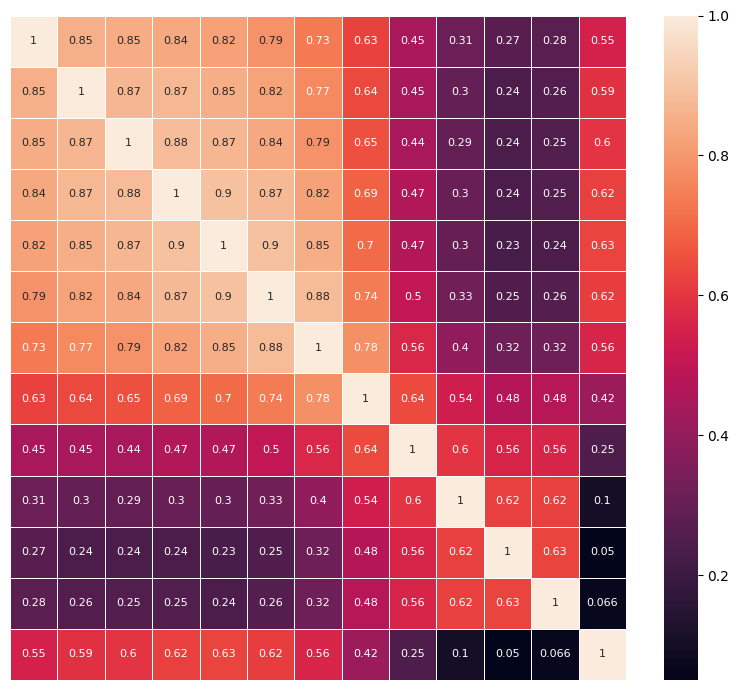

In [33]:
plt.figure(figsize=(8, 7))
sns.heatmap (b2AR_df_filt[[
                     'Nb80_10uM_norm_comb_score', 'Nb80_2.8uM_norm_comb_score', 'Nb80_816nM_norm_comb_score', \
                     'Nb80_233nM_norm_comb_score', 'Nb80_66nM_norm_comb_score', 'Nb80_19nM_norm_comb_score', \
                     'Nb80_5.4nM_norm_comb_score', 'Nb80_1.5nM_norm_comb_score', 'Nb80_444pM_norm_comb_score', \
                     'Nb80_126pM_norm_comb_score', 'Nb80_36pM_norm_comb_score', 'Nb80_10pM_norm_comb_score', 'surfexp_reps_comb']].corr(method='spearman'), \
                     annot=True, annot_kws={"fontsize":8}, linecolor='white', linewidths=0.5 )
plt.xticks([])
plt.yticks([])
plt.tight_layout()

([], [])

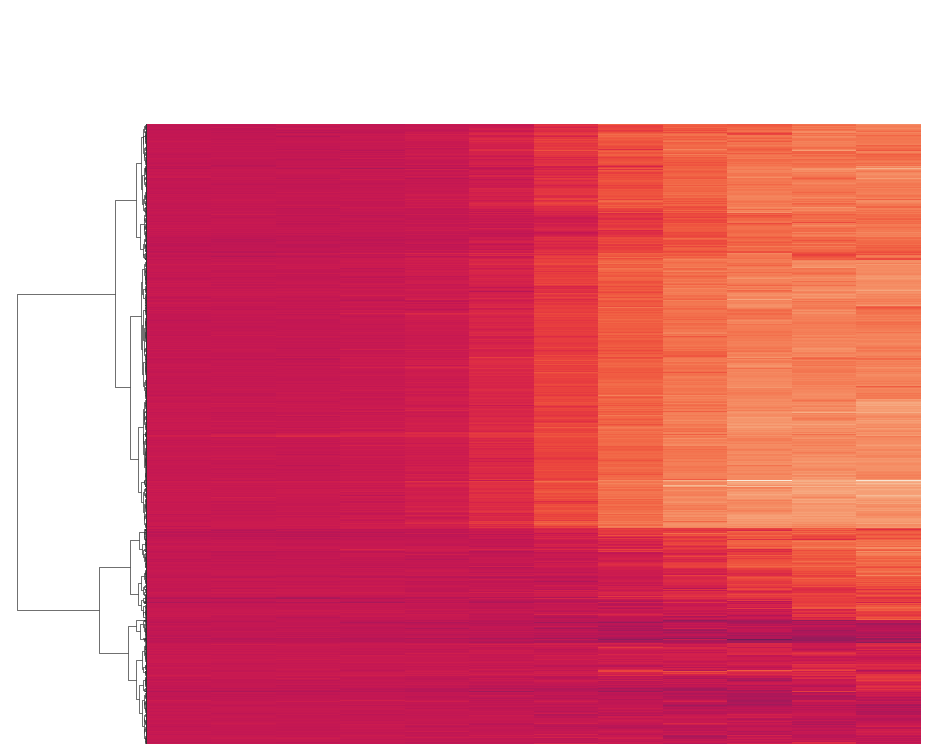

In [8]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

correlations = b2AR_df_filt[['Nb80_10pM_WT_normed_score', 'Nb80_36pM_WT_normed_score', \
        'Nb80_126pM_WT_normed_score', 'Nb80_444pM_WT_normed_score', 'Nb80_1.5nM_WT_normed_score', \
        'Nb80_5.4nM_WT_normed_score', 'Nb80_19nM_WT_normed_score', 'Nb80_66nM_WT_normed_score', \
        'Nb80_233nM_WT_normed_score', 'Nb80_816nM_WT_normed_score', 'Nb80_2.8uM_WT_normed_score', \
        'Nb80_10uM_WT_normed_score']]
correlations_array = np.asarray(b2AR_df_filt[['Nb80_10pM_WT_normed_score', 'Nb80_36pM_WT_normed_score', \
        'Nb80_126pM_WT_normed_score', 'Nb80_444pM_WT_normed_score', 'Nb80_1.5nM_WT_normed_score', \
        'Nb80_5.4nM_WT_normed_score', 'Nb80_19nM_WT_normed_score', 'Nb80_66nM_WT_normed_score', \
        'Nb80_233nM_WT_normed_score', 'Nb80_816nM_WT_normed_score', 'Nb80_2.8uM_WT_normed_score', \
        'Nb80_10uM_WT_normed_score']])

row_linkage = hierarchy.linkage(
    distance.pdist(correlations_array), method='ward')


clustermap = sns.clustermap(correlations, row_linkage=row_linkage, col_cluster=False, \
                            dendrogram_ratio=0.15, method="ward", cbar_pos=None)
plt.yticks([])
plt.xticks([])
#plt.tight_layout()
#plt.savefig('dose_response_clustermap_no_cbar.png', dpi=300)

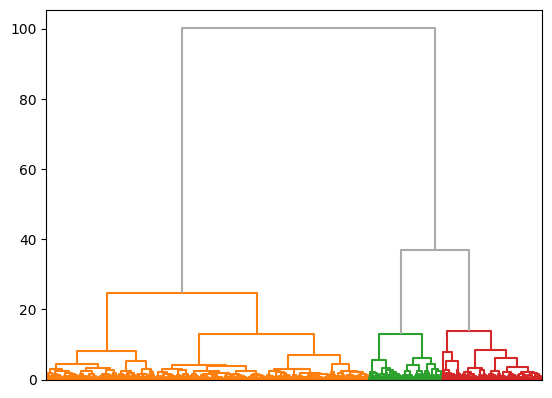

In [10]:
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
den = dendrogram(row_linkage, labels=b2AR_df_filt.index, color_threshold=35, no_labels=True, above_threshold_color='#AAAAAA')


In [11]:
clusters_id = {}
for index_val in range(0, len(b2AR_df_filt)):
    clusters_id[den['ivl'][index_val]] = den['leaves_color_list'][index_val]
#len(b2AR_com_and_norm_df_filt)

cluster_identity_list = []
for var in b2AR_df_filt.index:
    cluster_identity_list.append(clusters_id[var])

b2AR_df_filt['cluster_ID'] = cluster_identity_list

In [14]:
b2AR_df_filt_QC = b2AR_df_filt.loc[(b2AR_df_filt['r2'] > 0.9) &\
(b2AR_df_filt['Emax_QC'] == True) & \
(b2AR_df_filt['EC50_QC'] == True) & \
(b2AR_df_filt['slope'] < 2)].copy()
print (len(b2AR_df_filt_QC))

b2AR_df_filt_missense_QC = b2AR_df_filt_missense.loc[(b2AR_df_filt_missense['r2'] > 0.9) &\
(b2AR_df_filt_missense['Emax_QC'] == True) & \
(b2AR_df_filt_missense['EC50_QC'] == True) & \
(b2AR_df_filt_missense['slope'] < 2)].copy()
print (len(b2AR_df_filt_missense_QC))

5588
5094


In [15]:
ser_dil_concs = []
ser_dil_concs.append(0.00001)
ser_dil_concs.append(0.00001/3.5)
ser_dil_concs.append(0.00001/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)
ser_dil_concs.append(0.00001/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5/3.5)


In [19]:
def pull_out_plot(var):
    x_points = ser_dil_concs[::-1]
    sel_df = b2AR_df_filt_QC.loc[var]
    y_points = list(sel_df[['Nb80_10pM_WT_normed_score', 'Nb80_36pM_WT_normed_score', \
        'Nb80_126pM_WT_normed_score', 'Nb80_444pM_WT_normed_score', 'Nb80_1.5nM_WT_normed_score', \
        'Nb80_5.4nM_WT_normed_score', 'Nb80_19nM_WT_normed_score', 'Nb80_66nM_WT_normed_score', \
        'Nb80_233nM_WT_normed_score', 'Nb80_816nM_WT_normed_score', 'Nb80_2.8uM_WT_normed_score', \
        'Nb80_10uM_WT_normed_score']])
    x_fit = np.geomspace(x_points[-1], x_points[0],100)
    y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
    plt.plot(x_points, y_points, 'ko')
    plt.plot(x_fit , y_fit, color='red')
    plt.xscale('log')

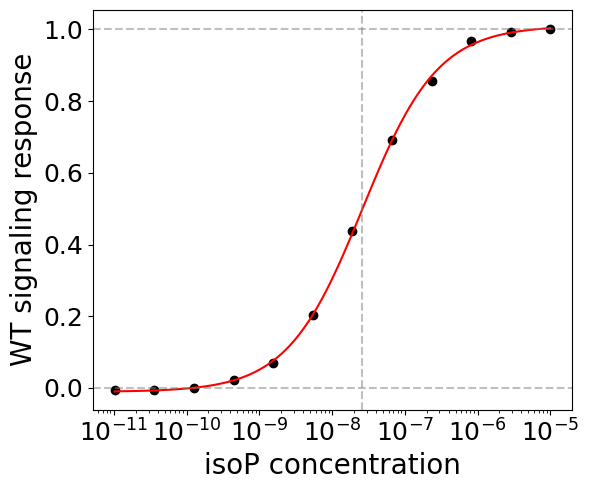

In [20]:
plt.figure(figsize=(6, 5))

pull_out_plot('WT')
plt.axhline(y=0, linestyle='dashed', color='grey', alpha=0.5)
plt.axhline(y=1, linestyle='dashed', color='grey', alpha=0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('isoP concentration', fontsize=20)
plt.ylabel('WT signaling response', fontsize=20)
plt.axvline(x = b2AR_df_filt_QC.loc['WT']['EC50'], linestyle='dashed', color='grey', alpha=0.5)
plt.tight_layout()
#plt.savefig('WT_dose_response_curve.png', dpi=200)

In [22]:
print (b2AR_df_filt_QC.loc['WT']['Emax'])
print (b2AR_df_filt_QC.loc['WT']['Emin'])
print (b2AR_df_filt_QC.loc['WT']['EC50'])
print (b2AR_df_filt_QC.loc['WT']['slope'])


1.0104765532695847
-0.0110773004293594
2.6225006687744683e-08
0.8401623871672473


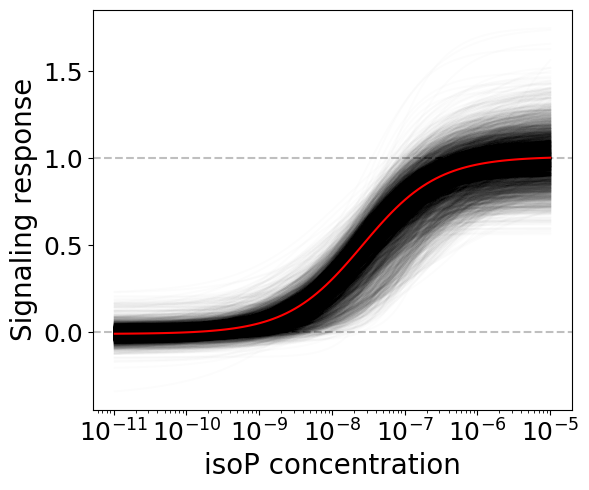

In [24]:
plt.figure(figsize=(6, 5))
plt.xscale('log')
plt.axhline(y=0, linestyle='dashed', color='grey', alpha=0.5)
plt.axhline(y=1, linestyle='dashed', color='grey', alpha=0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('isoP concentration', fontsize=20)
plt.ylabel('Signaling response', fontsize=20)


for var in b2AR_df_filt_QC.loc[b2AR_df_filt_QC['cluster_ID'] == 'C1'].index:
    sel_df = b2AR_df_filt_QC.loc[var]
    x_points = ser_dil_concs[::-1]
    x_fit = np.geomspace(x_points[-1], x_points[0],100)   
    y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
    plt.plot(x_fit , y_fit, color='k', alpha=0.01)

sel_df = b2AR_df_filt_QC.loc['WT']
x_points = ser_dil_concs[::-1]
x_fit = np.geomspace(x_points[-1], x_points[0],100) 
y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
plt.plot(x_fit , y_fit, color='r', alpha=1)

plt.tight_layout()
#plt.savefig('cluster1_all_curves.png', dpi=300)

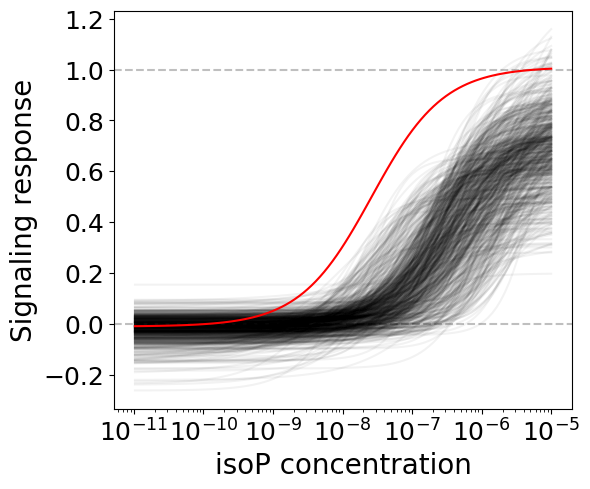

In [25]:
plt.figure(figsize=(6, 5))
plt.xscale('log')
plt.axhline(y=0, linestyle='dashed', color='grey', alpha=0.5)
plt.axhline(y=1, linestyle='dashed', color='grey', alpha=0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('isoP concentration', fontsize=20)
plt.ylabel('Signaling response', fontsize=20)


for var in b2AR_df_filt_QC.loc[b2AR_df_filt_QC['cluster_ID'] == 'C2'].index:
    sel_df = b2AR_df_filt_QC.loc[var]
    x_points = ser_dil_concs[::-1]
    x_fit = np.geomspace(x_points[-1], x_points[0],100)   
    y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
    plt.plot(x_fit , y_fit, color='k', alpha=0.05)
sel_df = b2AR_df_filt_QC.loc['WT']
x_points = ser_dil_concs[::-1]
x_fit = np.geomspace(x_points[-1], x_points[0],100) 
y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
plt.plot(x_fit , y_fit, color='r', alpha=1)
plt.tight_layout()
#plt.savefig('cluster2_all_curves.png', dpi=300)

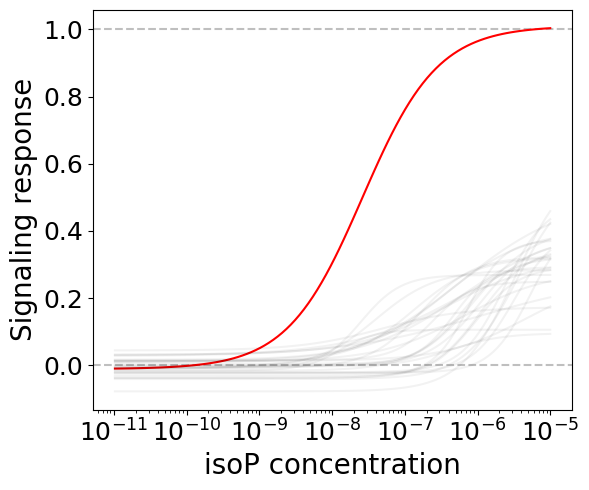

In [26]:
plt.figure(figsize=(6, 5))
plt.xscale('log')
plt.axhline(y=0, linestyle='dashed', color='grey', alpha=0.5)
plt.axhline(y=1, linestyle='dashed', color='grey', alpha=0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('isoP concentration', fontsize=20)
plt.ylabel('Signaling response', fontsize=20)
sel_df = b2AR_df_filt_QC.loc['WT']
x_points = ser_dil_concs[::-1]
x_fit = np.geomspace(x_points[-1], x_points[0],100) 
y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
plt.plot(x_fit , y_fit, color='r', alpha=1)


for var in b2AR_df_filt_QC.loc[b2AR_df_filt_QC['cluster_ID'] == 'C3'].index:
    sel_df = b2AR_df_filt_QC.loc[var]
    x_points = ser_dil_concs[::-1]
    x_fit = np.geomspace(x_points[-1], x_points[0],100)   
    y_fit = [sel_df.Emin + ((sel_df.Emax - sel_df.Emin) * i**sel_df.slope) / (sel_df.EC50**sel_df.slope + i**sel_df.slope) for i in x_fit]
    plt.plot(x_fit , y_fit, color='k', alpha=0.05)
plt.tight_layout()
#plt.savefig('cluster3_all_curves.png', dpi=300)

/var/folders/3d/j63_n68s0rd4x0j0qjlcqssw0000gp/T/ipykernel_52342/2330908227.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b2AR_df_filt.loc[b2AR_df_filt['stop'] == False]['r2'], \
/var/folders/3d/j63_n68s0rd4x0j0qjlcqssw0000gp/T/ipykernel_52342/2330908227.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

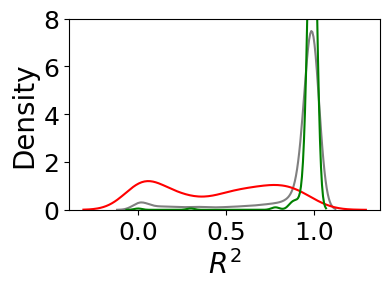

In [36]:
plt.figure(figsize=(4, 3))
sns.distplot(b2AR_df_filt.loc[b2AR_df_filt['stop'] == False]['r2'], \
         kde=True, hist=False, color='gray')

sns.distplot(b2AR_df_filt.loc[b2AR_df_filt['stop'] == True]['r2'], \
         kde=True, hist=False, color='red')

sns.distplot(b2AR_df_filt.loc[b2AR_df_filt['syn_WT'] == True]['r2'], \
         kde=True, hist=False, color='green')

plt.ylim(0, 8)
plt.xlabel('$R^2$', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('stop_syn_missense_RMSD_kde.png', dpi=250)

In [27]:
print (len((b2AR_df_filt.loc[b2AR_df_filt['cluster_ID'] == 'C1'])))

5006


In [28]:
print (len((b2AR_df_filt.loc[(b2AR_df_filt['cluster_ID'] == 'C1') & \
            (b2AR_df_filt['r2'] > 0.9)])))

4935


In [29]:
print (len((b2AR_df_filt.loc[(b2AR_df_filt['cluster_ID'] == 'C1') & \
            (b2AR_df_filt['r2'] > 0.9) & \
           (b2AR_df_filt['EC50_QC'] == True)])))

4929


In [30]:
print (len((b2AR_df_filt.loc[(b2AR_df_filt['cluster_ID'] == 'C1') & \
            (b2AR_df_filt['r2'] > 0.9) & \
           (b2AR_df_filt['EC50_QC'] == True) & \
           (b2AR_df_filt['Emax_QC'] == True)])))

4928


In [31]:
print (len((b2AR_df_filt.loc[(b2AR_df_filt['cluster_ID'] == 'C1') & \
            (b2AR_df_filt['r2'] > 0.9) & \
           (b2AR_df_filt['EC50_QC'] == True) & \
           (b2AR_df_filt['Emax_QC'] == True) & 
           (b2AR_df_filt['slope'] < 2)])))

4886


/var/folders/3d/j63_n68s0rd4x0j0qjlcqssw0000gp/T/ipykernel_52342/2743169062.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sel_df['Nb80_10uM_norm_comb_score'], hist=False, label= '10 uM')
/var/folders/3d/j63_n68s0rd4x0j0qjlcqssw0000gp/T/ipykernel_52342/2743169062.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

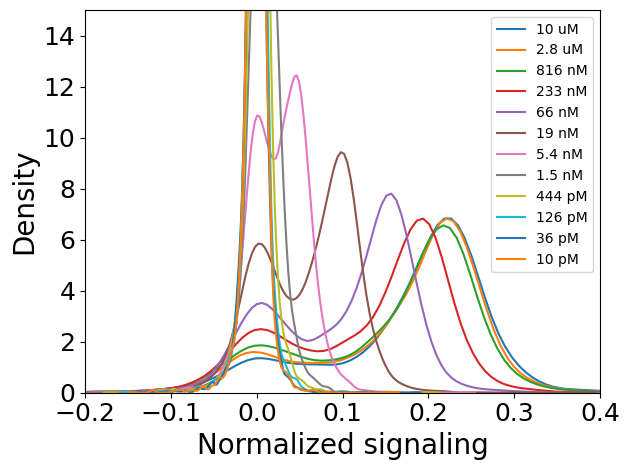

In [32]:
sel_df = b2AR_df.loc[(b2AR_df['syn_WT'] == False) & (b2AR_df['stop'] == False)]

plt.xlim(-0.2, 0.4)
plt.ylim(0, 15)
sns.distplot(sel_df['Nb80_10uM_norm_comb_score'], hist=False, label= '10 uM')
sns.distplot(sel_df['Nb80_2.8uM_norm_comb_score'], hist=False, label='2.8 uM')
sns.distplot(sel_df['Nb80_816nM_norm_comb_score'], hist=False, label='816 nM')
sns.distplot(sel_df['Nb80_233nM_norm_comb_score'], hist=False, label='233 nM')
sns.distplot(sel_df['Nb80_66nM_norm_comb_score'], hist=False, label='66 nM')
sns.distplot(sel_df['Nb80_19nM_norm_comb_score'], hist=False, label='19 nM')
sns.distplot(sel_df['Nb80_5.4nM_norm_comb_score'], hist=False, label='5.4 nM')
sns.distplot(sel_df['Nb80_1.5nM_norm_comb_score'], hist=False, label='1.5 nM')
sns.distplot(sel_df['Nb80_444pM_norm_comb_score'], hist=False, label='444 pM')
sns.distplot(sel_df['Nb80_126pM_norm_comb_score'], hist=False, label='126 pM')
sns.distplot(sel_df['Nb80_36pM_norm_comb_score'], hist=False, label='36 pM')
sns.distplot(sel_df['Nb80_10pM_norm_comb_score'], hist=False, label='10 pM')
#plt.yscale('log')
plt.legend()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Normalized signaling', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.tight_layout()
#plt.savefig('dose_response_total_kde.png', dpi=250)